Q1
Plot the 3D surface of Rosenbrock function

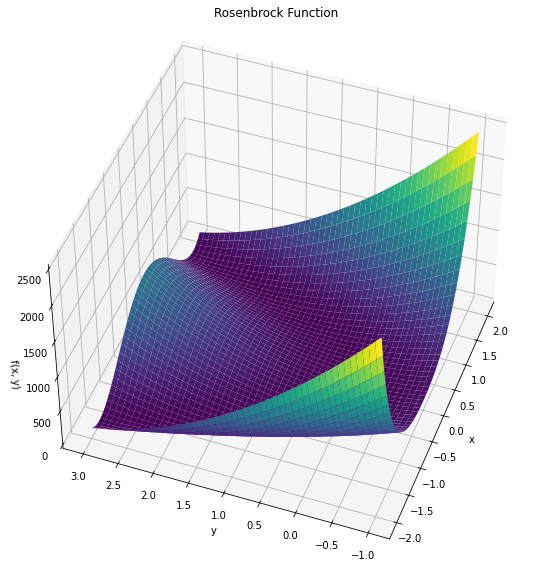

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# define x, y, Z
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('Rosenbrock Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# view
ax.view_init(45, 200)

plt.tight_layout()
plt.show()


a) Steepest descent method

$\eta=0.001$

Final solution: x = 0.9988834002152385, y = 0.9977635760398126, f(x, y) = 1.2487942295249145e-06
η = 0.001, number of iteration: 15099


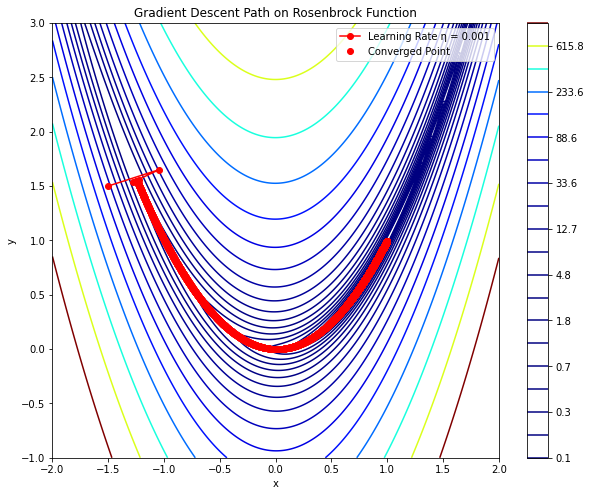

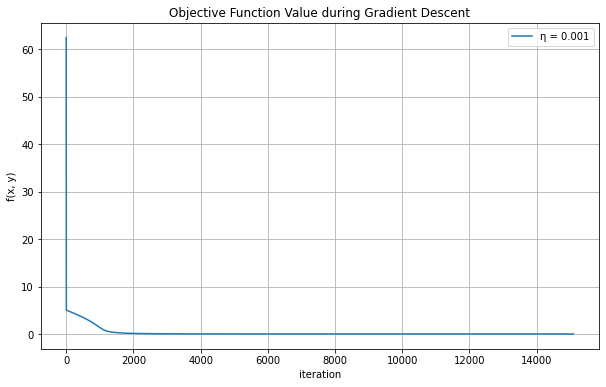

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def gradient(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# gradient descent algorithm
def gradient_descent(eta, x0, y0, tol=1e-6, max_iter=100000):
    x, y = x0, y0
    trajectory = [(x, y)]
    function_values = [f(x, y)]
    for i in range(max_iter):
        grad = gradient(x, y)
        x_new = x - eta * grad[0]
        y_new = y - eta * grad[1]
        trajectory.append((x_new, y_new))
        function_values.append(f(x_new, y_new))

        # check if converged
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    print(f"Final solution: x = {x}, y = {y}, f(x, y) = {f(x, y)}")
    return np.array(trajectory), np.array(function_values), i

# initial point and learning rate
x0, y0 = -1.5, 1.5
eta = 0.001

trajectory, function_values, iterations = gradient_descent(eta, x0, y0)
print(f"η = {eta}, number of iteration: {iterations}")

# trajectory of (x, y)
x_vals, y_vals = trajectory[:, 0], trajectory[:, 1]

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

plt.plot(x_vals, y_vals, 'o-', color='red', label=f"Learning Rate η = {eta}")
plt.plot(x_vals[-1], y_vals[-1], 'ro', label="Converged Point")
plt.title('Gradient Descent Path on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(function_values)), function_values, label=f"η = {eta}")
# plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('f(x, y)')
plt.title('Objective Function Value during Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


$\eta=0.5$

C:\Users\ZHANG\AppData\Local\Temp/ipykernel_28596/2077401687.py:6: RuntimeWarning: overflow encountered in scalar power
  return (1 - x)**2 + 100 * (y - x**2)**2
C:\Users\ZHANG\AppData\Local\Temp/ipykernel_28596/1782342126.py:5: RuntimeWarning: overflow encountered in scalar power
  df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
C:\Users\ZHANG\AppData\Local\Temp/ipykernel_28596/2077401687.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  return (1 - x)**2 + 100 * (y - x**2)**2
C:\Users\ZHANG\AppData\Local\Temp/ipykernel_28596/1782342126.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx = -2 * (1 - x) - 400 * x * (y - x**2)


Final solution: x = nan, y = nan, f(x, y) = nan
η = 0.5, number of iteration: 99999


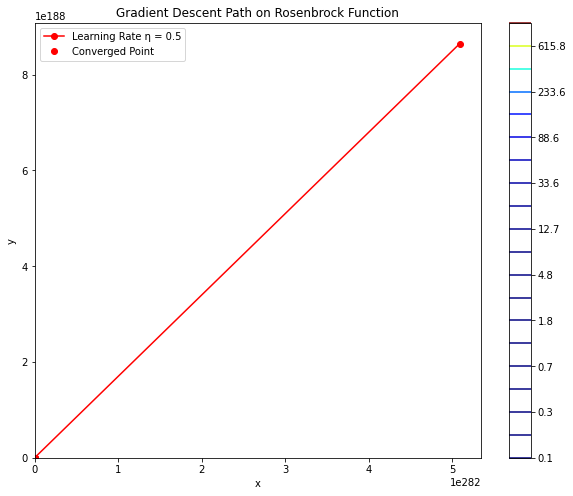

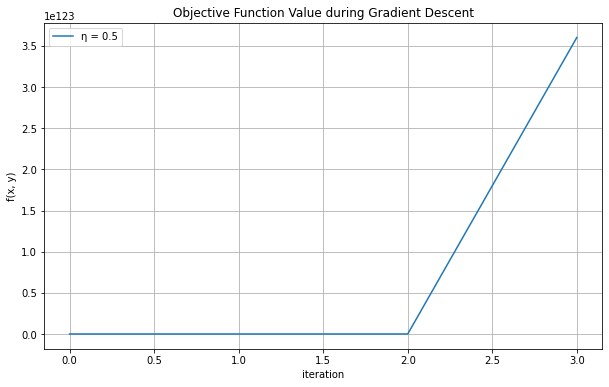

In [33]:
# initial point and learning rate
x0, y0 = -1.5, 1.5
eta = 0.5

trajectory, function_values, iterations = gradient_descent(eta, x0, y0)
print(f"η = {eta}, number of iteration: {iterations}")

# trajectory of (x, y)
x_vals, y_vals = trajectory[:, 0], trajectory[:, 1]

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

plt.plot(x_vals, y_vals, 'o-', color='red', label=f"Learning Rate η = {eta}")
plt.plot(x_vals[-1], y_vals[-1], 'ro', label="Converged Point")
plt.title('Gradient Descent Path on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(function_values)), function_values, label=f"η = {eta}")
# plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('f(x, y)')
plt.title('Objective Function Value during Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


Therefore, with a larger learning rate, the algorithm won't converge.

b) Newton's method

Final solution: x = 0.999999731700683, y = 0.9999994634014314, f(x, y) = 7.198452349493104e-14
Converged in 5 iterations.


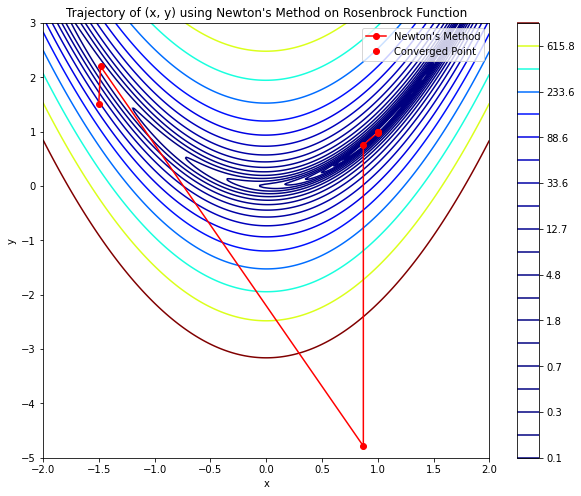

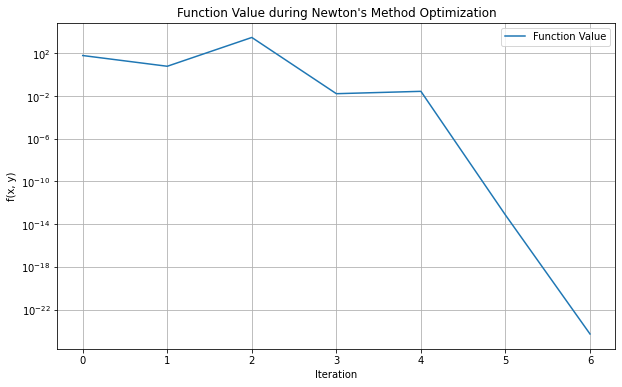

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient of Rosenbrock function
def gradient(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# Hessian of Rosenbrock function
def hessian(x, y):
    d2f_dx2 = 2 - 400 * (y - x**2) + 800 * x**2
    d2f_dydx = -400 * x
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dydx], [d2f_dydx, d2f_dy2]])

# Newton's method
def newtons_method(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    trajectory = [(x, y)]
    function_values = [f(x, y)]
    for i in range(max_iter):
        grad = gradient(x, y)
        hess = hessian(x, y)
        # Update rule: Δw(n) = -H^{-1}(n)g(n)
        delta = -np.linalg.inv(hess).dot(grad)
        x_new = x + delta[0]
        y_new = y + delta[1]
        trajectory.append((x_new, y_new))
        function_values.append(f(x_new, y_new))

        # Check for convergence
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    print(f"Final solution: x = {x}, y = {y}, f(x, y) = {f(x, y)}")
    return np.array(trajectory), np.array(function_values), i

x0, y0 = -1.5, 1.5
tol = 1e-6
max_iter = 100

# run Newton's method
trajectory, function_values, iterations = newtons_method(x0, y0, tol, max_iter)
print(f"Converged in {iterations} iterations.")

x_vals, y_vals = trajectory[:, 0], trajectory[:, 1]
x = np.linspace(-2, 2, 400)
y = np.linspace(-5, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

plt.plot(x_vals, y_vals, 'o-', color='red', label='Newton\'s Method')
plt.plot(x_vals[-1], y_vals[-1], 'ro', label='Converged Point')
plt.title('Trajectory of (x, y) using Newton\'s Method on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(function_values)), function_values, label="Function Value")
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x, y)')
plt.title('Function Value during Newton\'s Method Optimization')
plt.legend()
plt.grid(True)
plt.show()


Q3
a Anaylze the distribution of the labels in the training and test sets

In [53]:
# mod(87,3) + 1
group_id = 87 % 3 + 1
print("Group:", group_id)

Group: 1


[261 739]


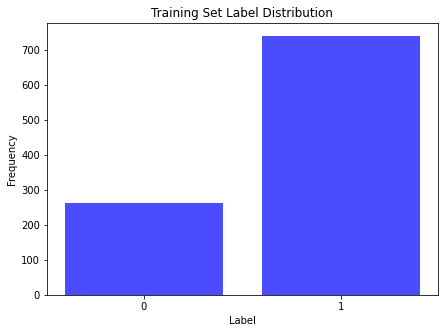

[ 66 184]


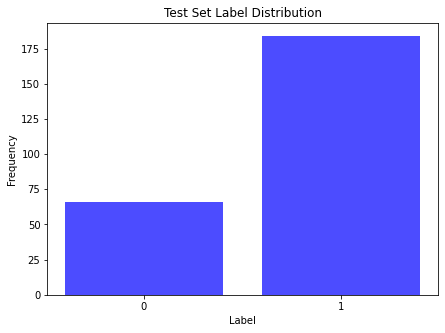

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt

def extract_label(att_file, group_id):
    labels = np.loadtxt(att_file)

    # get label
    label = labels[group_id - 1]
    return label

def extract_labels_from_directory(directory, group_id):
    labels = []
    filenames = os.listdir(directory)
    for filename in filenames:
        if filename.endswith('.att'):
            att_file = os.path.join(directory, filename)
            label = extract_label(att_file, group_id)
            labels.append(label)
    return np.array(labels)


def plot_label_distribution(labels, title):
    unique_labels, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(7, 5))
    plt.bar(unique_labels, counts, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.xticks(unique_labels)
    plt.show()

# train data
train_label_dir = './Face Database/TrainImages/'
train_labels = extract_labels_from_directory(train_label_dir, group_id)
plot_label_distribution(train_labels, 'Training Set Label Distribution')

# test data
test_label_dir = './Face Database/TestImages/'
test_labels = extract_labels_from_directory(test_label_dir, group_id)
plot_label_distribution(test_labels, 'Test Set Label Distribution')


b) Apply Rosenblatt's perceptron

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image
from tqdm import *

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        for _ in tqdm(range(self.n_iter)):
            for i in range(X.shape[0]):
                linear_output = np.dot(X[i], self.weights[1:]) + self.weights[0]
                y_pred = self._activation(linear_output)
                update = self.learning_rate * (y[i] - y_pred)
                self.weights[1:] += update * X[i]
                self.weights[0] += update  # Update bias

    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        return self._activation(linear_output)

    def _activation(self, linear_output):
        return np.where(linear_output >= 0, 1, 0)

# Function to load and preprocess images
def load_images_and_labels(image_dir, label_dir, group_id, new_size=None):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    X, y = [], []

    for image_file in image_files:
        img = Image.open(os.path.join(image_dir, image_file))
        img = img.convert('L')  # Convert to grayscale
        # if img.size != (101, 101):
        #     print(f"Resizing image: {image_file}")
        if new_size:
            img = img.resize(new_size)
        else:
            img = img.resize((101, 101))  # Resize to 101*101 pixels
        img_array = np.array(img).flatten()
        X.append(img_array)

        att_file = image_file.replace('.jpg', '.att')
        label = np.loadtxt(os.path.join(label_dir, att_file))
        y.append(label[group_id - 1])

    return np.array(X), np.array(y)

# Function to plot label distribution
def plot_label_distribution(labels, title):
    unique_labels, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(7, 5))
    plt.bar(unique_labels, counts, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.xticks(unique_labels)
    plt.show()

# Train and evaluate the perceptron with different preprocessing methods
def train_and_evaluate(X_train, y_train, X_test, y_test):
    perceptron = Perceptron(learning_rate=0.01, n_iter=1000)

    # Train the perceptron
    perceptron.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = perceptron.predict(X_train)
    y_test_pred = perceptron.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train and evaluate the perceptron model

In [8]:
group_id = (87 % 3) + 1

train_image_dir = './Face Database/TrainImages/'
train_label_dir = './Face Database/TrainImages/'

test_image_dir = './Face Database/TestImages/'
test_label_dir = './Face Database/TestImages/'

# Load data
X_train, y_train = load_images_and_labels(train_image_dir, train_label_dir, group_id)
X_test, y_test = load_images_and_labels(test_image_dir, test_label_dir, group_id)
train_and_evaluate(X_train, y_train, X_test, y_test)

100%|██████████| 1000/1000 [02:59<00:00,  5.56it/s]


Training Accuracy: 100.00%
Test Accuracy: 86.00%


Train and evaluate the perceptron model with different sizes and PCA

In [49]:
print("Naively Downsampl (50*50)")
X_train_downsampled, y_train = load_images_and_labels(train_image_dir, train_label_dir, group_id, new_size=(50, 50))
X_test_downsampled, y_test = load_images_and_labels(test_image_dir, test_label_dir, group_id, new_size=(50, 50))

train_and_evaluate(X_train_downsampled, y_train, X_test_downsampled, y_test)


Naively Downsampl (50x50)


100%|██████████| 1000/1000 [00:19<00:00, 51.60it/s]

Training Accuracy: 100.00%
Test Accuracy: 85.20%


In [16]:
print("Naively Downsampl (75*75)")
X_train_downsampled, y_train = load_images_and_labels(train_image_dir, train_label_dir, group_id, new_size=(75, 75))
X_test_downsampled, y_test = load_images_and_labels(test_image_dir, test_label_dir, group_id, new_size=(75, 75))

train_and_evaluate(X_train_downsampled, y_train, X_test_downsampled, y_test)


Naively Downsampl (75*75)


100%|██████████| 1000/1000 [00:26<00:00, 37.65it/s]

Training Accuracy: 100.00%
Test Accuracy: 84.80%


In [17]:
print("Naively Downsampl (25*25)")
X_train_downsampled, y_train = load_images_and_labels(train_image_dir, train_label_dir, group_id, new_size=(25, 25))
X_test_downsampled, y_test = load_images_and_labels(test_image_dir, test_label_dir, group_id, new_size=(25, 25))

train_and_evaluate(X_train_downsampled, y_train, X_test_downsampled, y_test)


Naively Downsampl (25*25)


100%|██████████| 1000/1000 [00:14<00:00, 69.32it/s]

Training Accuracy: 91.50%
Test Accuracy: 85.60%


In [19]:
from sklearn.decomposition import PCA
# Function to apply PCA
def apply_pca(X, n_components=100):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

X_train, y_train = load_images_and_labels(train_image_dir, train_label_dir, group_id)
X_test, y_test = load_images_and_labels(test_image_dir, test_label_dir, group_id)
print("\nPCA 150 components")
# Apply PCA to reduce dimensions
X_train_pca = apply_pca(X_train, n_components=150)
X_test_pca = apply_pca(X_test, n_components=150)

train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test)


PCA 150 components


100%|██████████| 1000/1000 [00:11<00:00, 88.66it/s]

Training Accuracy: 79.80%
Test Accuracy: 51.20%


In [20]:
# Apply PCA to reduce dimensions
X_train_pca = apply_pca(X_train, n_components=200)
X_test_pca = apply_pca(X_test, n_components=200)

train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test)

100%|██████████| 1000/1000 [00:11<00:00, 83.49it/s]

Training Accuracy: 82.80%
Test Accuracy: 50.80%


In [21]:
# Apply PCA to reduce dimensions
X_train_pca = apply_pca(X_train, n_components=50)
X_test_pca = apply_pca(X_test, n_components=50)

train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test)

100%|██████████| 1000/1000 [00:09<00:00, 103.33it/s]

Training Accuracy: 68.70%
Test Accuracy: 55.20%


In [24]:
# Apply PCA to reduce dimensions
X_train_pca = apply_pca(X_train, n_components=100)
X_test_pca = apply_pca(X_test, n_components=100)

train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test)

100%|██████████| 1000/1000 [00:11<00:00, 89.86it/s]

Training Accuracy: 74.90%
Test Accuracy: 49.60%


d) Train the MLP using batch mode

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 16)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(16, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out


def load_and_preprocess_data(image_dir, label_dir, group_id):
    # Load images and labels (from your existing function)
    X_train, y_train = load_images_and_labels(image_dir, label_dir, group_id)
    X_test, y_test = load_images_and_labels(image_dir, label_dir, group_id)

    # Convert labels to binary (if necessary) and return
    y_train = np.array(y_train).astype(np.float32)
    y_test = np.array(y_test).astype(np.float32)
    return X_train, y_train, X_test, y_test

# Function to train the MLP in batch mode
def train_mlp(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_X, batch_y in tqdm(train_loader):
            batch_X, batch_y = batch_X.float(), batch_y.float()

            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Function to evaluate the MLP
def evaluate_mlp(model, X, y):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X).float()
        outputs = model(X_tensor).squeeze().round().numpy()
        accuracy = accuracy_score(y, outputs)
        return accuracy

# Main program
if __name__ == "__main__":
    # Define parameters
    input_size = 101*101
    hidden_size = 16
    output_size = 1
    learning_rate = 0.001
    num_epochs = 20
    batch_size = 128

    group_id = (87 % 3) + 1
    train_image_dir = './Face Database/TrainImages/'
    train_label_dir = './Face Database/TrainImages/'
    test_image_dir = './Face Database/TestImages/'
    test_label_dir = './Face Database/TestImages/'

    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data(
        train_image_dir, train_label_dir, group_id)
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Create DataLoader for batch training
    train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the MLP in batch mode
    print("Training MLP in batch mode...")
    train_mlp(model, train_loader, criterion, optimizer, num_epochs)

    # Evaluate the MLP
    print("Evaluating MLP...")
    train_accuracy = evaluate_mlp(model, X_train, y_train)
    test_accuracy = evaluate_mlp(model, X_test, y_test)

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training MLP in batch mode...


100%|██████████| 8/8 [00:00<00:00, 68.63it/s]


Epoch [1/20], Loss: 0.6048


100%|██████████| 8/8 [00:00<00:00, 60.11it/s]


Epoch [2/20], Loss: 0.5756


100%|██████████| 8/8 [00:00<00:00, 65.09it/s]


Epoch [3/20], Loss: 0.5672


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch [4/20], Loss: 0.5591


100%|██████████| 8/8 [00:00<00:00, 74.22it/s]


Epoch [5/20], Loss: 0.5501


100%|██████████| 8/8 [00:00<00:00, 77.13it/s]


Epoch [6/20], Loss: 0.5379


100%|██████████| 8/8 [00:00<00:00, 76.42it/s]


Epoch [7/20], Loss: 0.5310


100%|██████████| 8/8 [00:00<00:00, 73.58it/s]


Epoch [8/20], Loss: 0.5164


100%|██████████| 8/8 [00:00<00:00, 81.25it/s]


Epoch [9/20], Loss: 0.5064


100%|██████████| 8/8 [00:00<00:00, 81.08it/s]


Epoch [10/20], Loss: 0.4938


100%|██████████| 8/8 [00:00<00:00, 56.16it/s]


Epoch [11/20], Loss: 0.4892


100%|██████████| 8/8 [00:00<00:00, 72.70it/s]


Epoch [12/20], Loss: 0.4725


100%|██████████| 8/8 [00:00<00:00, 74.60it/s]


Epoch [13/20], Loss: 0.4496


100%|██████████| 8/8 [00:00<00:00, 79.22it/s]


Epoch [14/20], Loss: 0.4429


100%|██████████| 8/8 [00:00<00:00, 68.73it/s]


Epoch [15/20], Loss: 0.4282


100%|██████████| 8/8 [00:00<00:00, 69.60it/s]


Epoch [16/20], Loss: 0.4268


100%|██████████| 8/8 [00:00<00:00, 66.44it/s]


Epoch [17/20], Loss: 0.4124


100%|██████████| 8/8 [00:00<00:00, 63.13it/s]


Epoch [18/20], Loss: 0.3902


100%|██████████| 8/8 [00:00<00:00, 80.04it/s]


Epoch [19/20], Loss: 0.3761


100%|██████████| 8/8 [00:00<00:00, 82.79it/s]


Epoch [20/20], Loss: 0.3700
Evaluating MLP...
Training Accuracy: 86.30%
Test Accuracy: 86.30%


e) Train the MLP using sequential mode

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from tqdm import tqdm

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 16)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(16, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out


def load_and_preprocess_data(image_dir, label_dir, group_id):
    # Load images and labels
    X_train, y_train = load_images_and_labels(image_dir, label_dir, group_id)
    X_test, y_test = load_images_and_labels(image_dir, label_dir, group_id)


    # Convert labels to binary and return
    y_train = np.array(y_train).astype(np.float32)
    y_test = np.array(y_test).astype(np.float32)
    return X_train, y_train, X_test, y_test

# Function to train the MLP in sequential mode
def train_mlp_sequential(model, X_train, y_train, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in tqdm(range(len(X_train))):
            sample_X = torch.tensor(X_train[i]).float().unsqueeze(0)
            sample_y = torch.tensor([y_train[i]]).float()

            # Forward pass
            output = model(sample_X)
            # print(output, sample_y, sample_y.unsqueeze(0))
            loss = criterion(output, sample_y.unsqueeze(0))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(X_train):.4f}')

# Function to evaluate the MLP
def evaluate_mlp(model, X, y):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X).float()
        outputs = model(X_tensor).squeeze().round().numpy()
        accuracy = accuracy_score(y, outputs)
        return accuracy

if __name__ == "__main__":
    # Define parameters
    input_size = 101*101
    hidden_size = 64
    output_size = 1
    learning_rate = 0.001
    num_epochs = 20

    group_id = (87 % 3) + 1
    train_image_dir = './Face Database/TrainImages/'
    train_label_dir = './Face Database/TrainImages/'
    test_image_dir = './Face Database/TestImages/'
    test_label_dir = './Face Database/TestImages/'

    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data(
        train_image_dir, train_label_dir, group_id)
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Initialize the model, loss function, and optimizer
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the MLP in sequential mode
    print("Training MLP in sequential mode...")
    train_mlp_sequential(model, X_train, y_train, criterion, optimizer, num_epochs)

    # Evaluate the MLP
    print("Evaluating MLP...")
    train_accuracy = evaluate_mlp(model, X_train, y_train)
    test_accuracy = evaluate_mlp(model, X_test, y_test)

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training MLP in sequential mode...


100%|██████████| 1000/1000 [00:09<00:00, 101.97it/s]


Epoch [1/20], Loss: 0.6009


100%|██████████| 1000/1000 [00:13<00:00, 72.13it/s]


Epoch [2/20], Loss: 0.5428


100%|██████████| 1000/1000 [00:13<00:00, 73.59it/s]


Epoch [3/20], Loss: 0.5335


100%|██████████| 1000/1000 [00:13<00:00, 73.07it/s]


Epoch [4/20], Loss: 0.5200


100%|██████████| 1000/1000 [00:13<00:00, 74.98it/s]


Epoch [5/20], Loss: 0.5040


100%|██████████| 1000/1000 [00:13<00:00, 73.74it/s]


Epoch [6/20], Loss: 0.4943


100%|██████████| 1000/1000 [00:14<00:00, 68.20it/s]


Epoch [7/20], Loss: 0.4701


100%|██████████| 1000/1000 [00:15<00:00, 66.61it/s]


Epoch [8/20], Loss: 0.4687


100%|██████████| 1000/1000 [00:16<00:00, 60.23it/s]


Epoch [9/20], Loss: 0.4389


100%|██████████| 1000/1000 [00:15<00:00, 62.72it/s]


Epoch [10/20], Loss: 0.4187


100%|██████████| 1000/1000 [00:15<00:00, 64.93it/s]


Epoch [11/20], Loss: 0.4048


100%|██████████| 1000/1000 [00:17<00:00, 58.26it/s]


Epoch [12/20], Loss: 0.3789


100%|██████████| 1000/1000 [00:14<00:00, 67.44it/s]


Epoch [13/20], Loss: 0.3737


100%|██████████| 1000/1000 [00:16<00:00, 62.11it/s]


Epoch [14/20], Loss: 0.3551


100%|██████████| 1000/1000 [00:15<00:00, 65.51it/s]


Epoch [15/20], Loss: 0.3419


100%|██████████| 1000/1000 [00:15<00:00, 65.96it/s]


Epoch [16/20], Loss: 0.3288


100%|██████████| 1000/1000 [00:14<00:00, 68.54it/s]


Epoch [17/20], Loss: 0.3192


100%|██████████| 1000/1000 [00:15<00:00, 65.68it/s]


Epoch [18/20], Loss: 0.3233


100%|██████████| 1000/1000 [00:14<00:00, 67.80it/s]


Epoch [19/20], Loss: 0.3213


100%|██████████| 1000/1000 [00:16<00:00, 62.40it/s]


Epoch [20/20], Loss: 0.3573
Evaluating MLP...
Training Accuracy: 87.70%
Test Accuracy: 87.70%
